In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("breastCancer.csv")

In [4]:
data.head(3)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [8]:
data.shape

(699, 11)

In [9]:
data["class"].unique()

array([2, 4], dtype=int64)

In [10]:
# here the 2 means that begnin and 4 represnt the melignant

In [11]:
# check the data types of data

In [12]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [13]:
# here we observe that "bare_nucleoli" have data types object but int are present in it
data["bare_nucleoli"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [14]:
# so we replace the question mark with nan values

In [15]:
data["bare_nucleoli"]=data["bare_nucleoli"].replace('?',np.nan)

In [16]:
data.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [17]:
# now dealing with the nan values dropping the nan values are not so here we replace it whether with the meam mode and median 


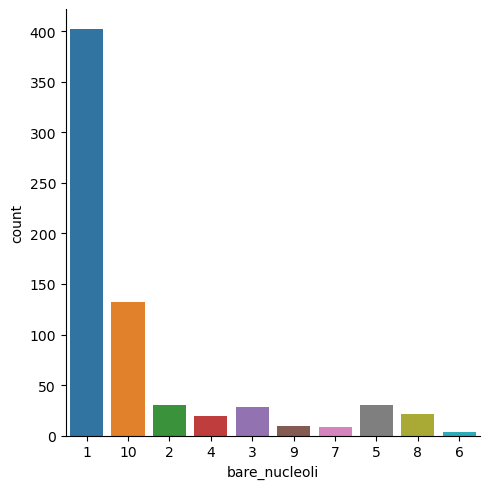

In [23]:
# so here we draw the graph and check the skewness of the data
sns.catplot(x="bare_nucleoli",data=data,kind="count")

In [25]:
# so here we observe that the data ios positively skew to the right so here we usr the median for filling the nan values
data.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [28]:
data["bare_nucleoli"].fillna(data["bare_nucleoli"].median(),inplace=True)

In [29]:
# now check the nan value that we have any nan value or not
data.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [30]:
# now check the data

In [31]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [32]:
data.drop("id",axis=1,inplace=True)

In [33]:
data

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


### VISUALIZATION

<AxesSubplot:xlabel='bare_nucleoli', ylabel='Density'>

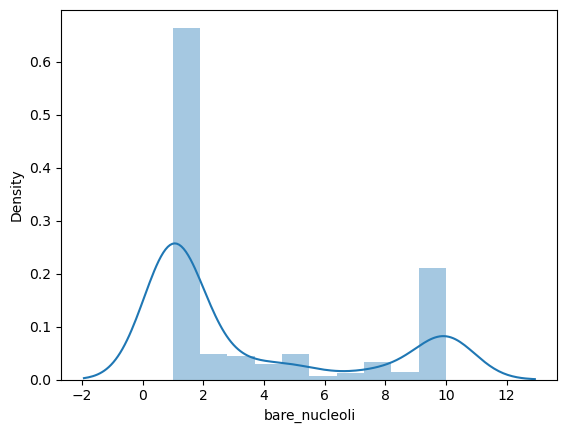

In [37]:
import warnings 
warnings.filterwarnings("ignore")

sns.distplot(data["bare_nucleoli"])

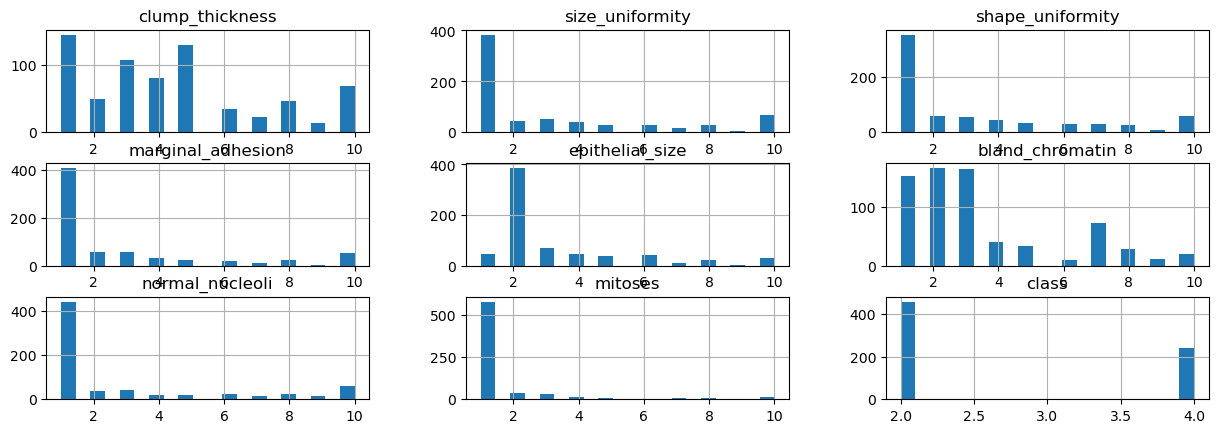

In [40]:
# we also check the distribution of the whole data by plotting
data.hist(bins=20,figsize=(15,10),layout=(6,3))
plt.show()

In [41]:
# here we observe thta almos are are right skewwed

In [42]:
# check the correlation of the data

In [43]:
data.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<AxesSubplot:>

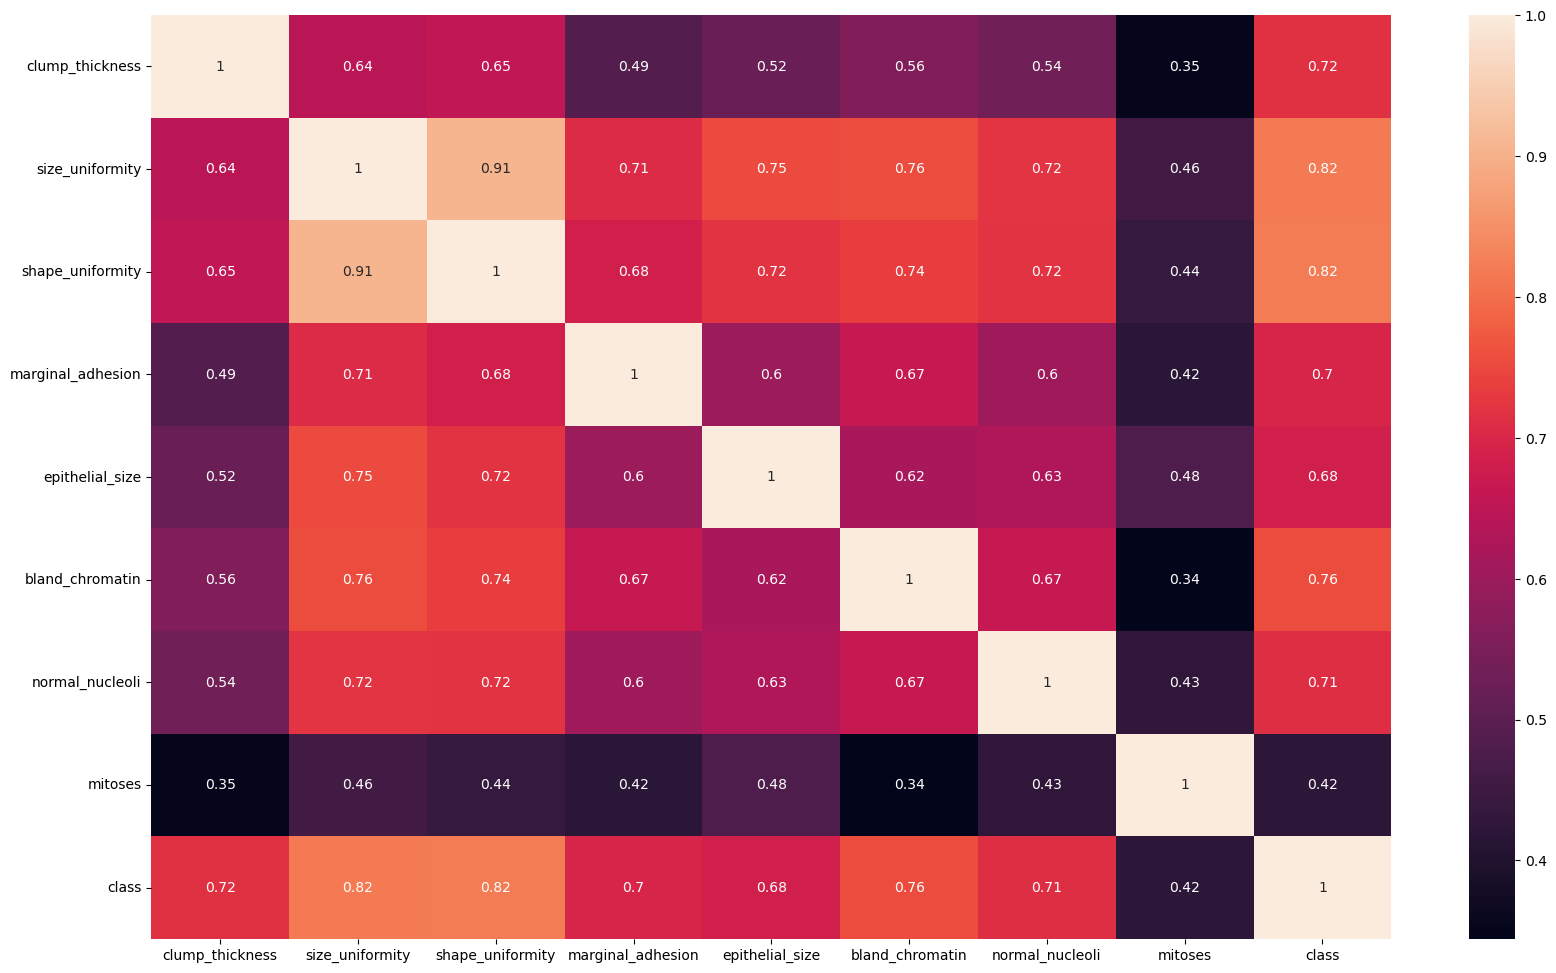

In [45]:
# now plot the corr by using the heatmap
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

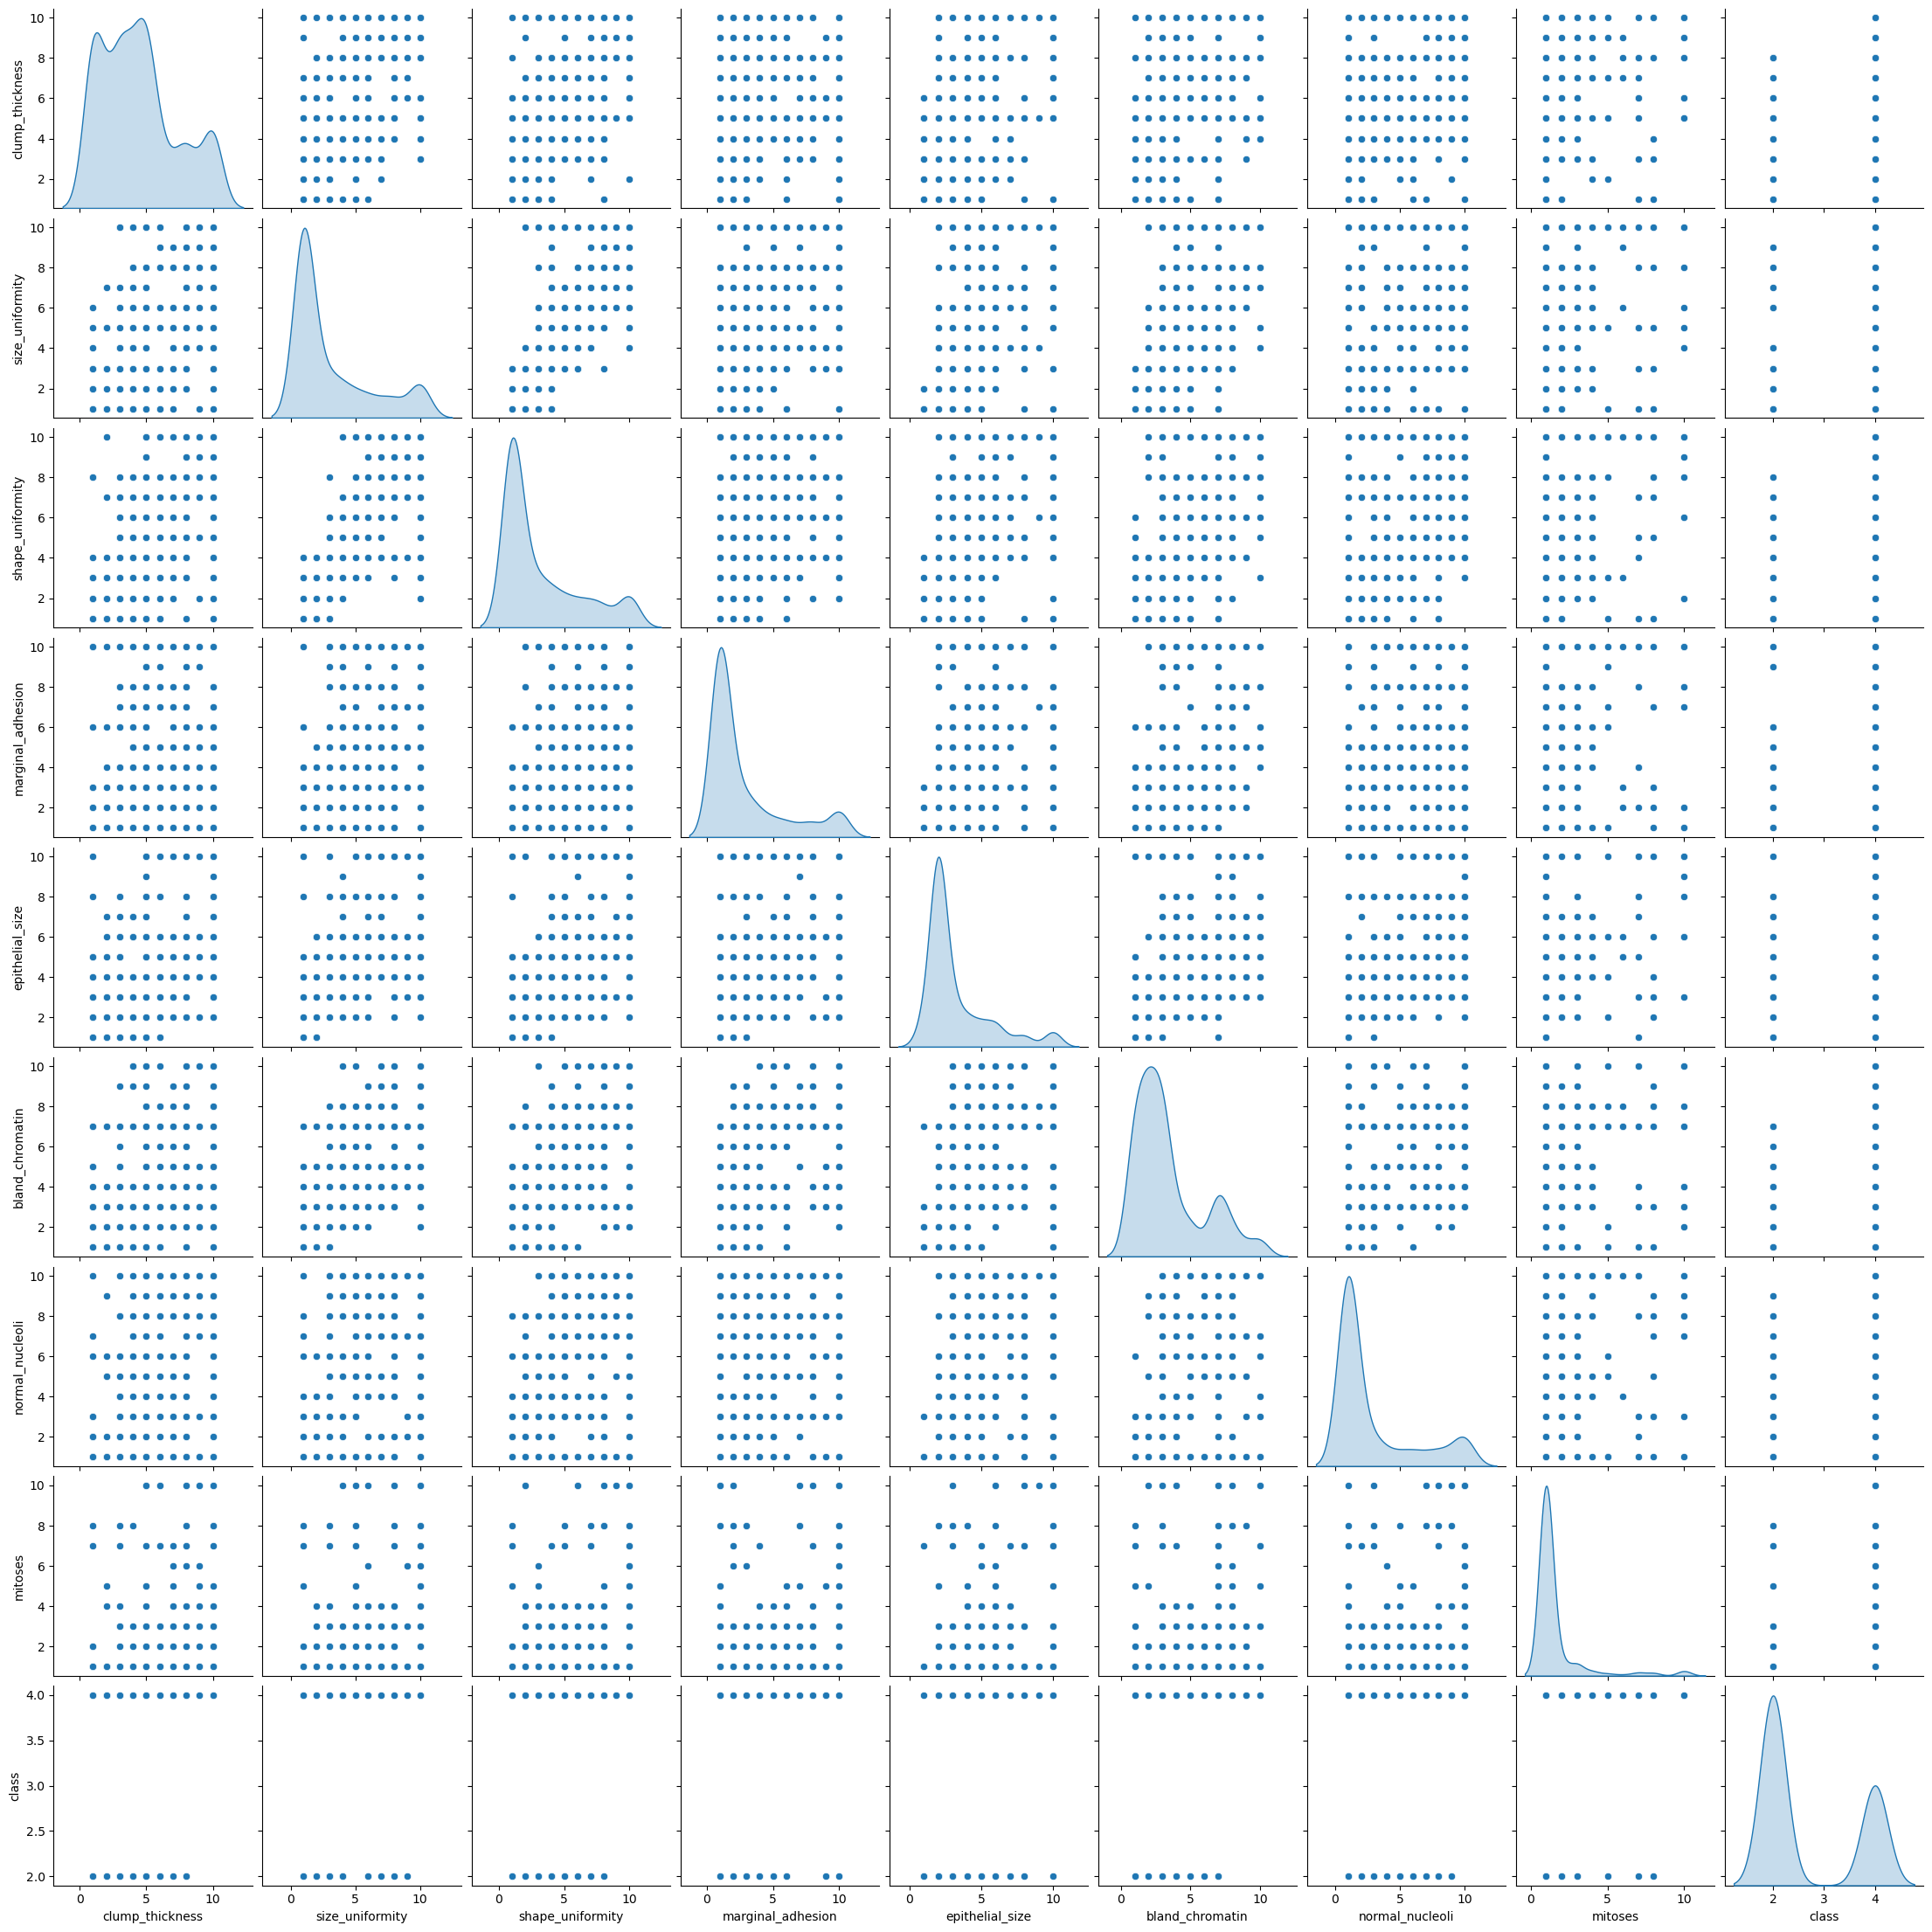

In [48]:
# we also check the whole data distribution by using distplot
sns.pairplot(data,diag_kind="kde")


# Building the model

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x=data.drop("class",axis=1)
y=data["class"]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [56]:
prediction1=knn.predict(x_test)

In [57]:
# now check the accuracy score of the model
knn.score(x_test,y_test)

0.9761904761904762

In [58]:
# so making the confusion metrics

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm=confusion_matrix(y_test,prediction1,labels=[2,4])

In [64]:
cm_df=pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ["predicted B","predicted M"]])

<AxesSubplot:>

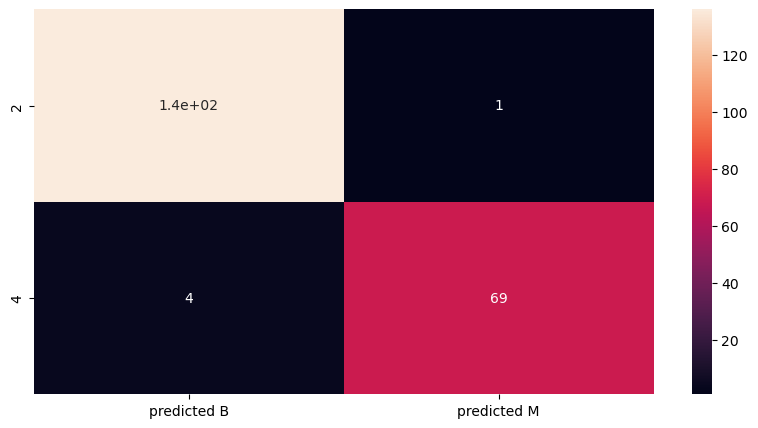

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_df,annot=True)

In [66]:
# now building the SVC

In [67]:
from sklearn.svm import SVC

In [68]:
svc=SVC(C=3,gamma=0.025,kernel="linear")

In [69]:
svc.fit(x_train,y_train)

SVC(C=3, gamma=0.025, kernel='linear')

In [70]:
prediction2=svc.predict(x_test)

In [71]:
# now the check the score of this model

In [72]:
svc.score(x_test,y_test)

0.9714285714285714

In [73]:
# now making the confusion matrix as we made above

In [74]:
import pickle 
pickle.dump(svc,open("svc_model.pkl","wb"))

In [78]:
svc.feature_importances_

AttributeError: 'SVC' object has no attribute 'feature_importances_'